## Topics in Model Performance

References
1. Bayesian Analysis with Python: Introduction to Statistical Modeling and Probabilistic Programming with PyMC3 and ArViz, 2nd Edition

### Underfitting vs. Overfitting

Most folks have by now heard of underfitting and overfitting a model. Simpler models should be preferred but not at the cost of accuracy. An overfit model, on the other hand, may not generalize well on new data. We can measure how well a model fits the data using the $R^2$ metric which measures the proportion of explained variance.

## ADD DETAIL ON HOW R2 explains a model fit

If we use the example of linear regression and start with a first order regression to explain the data, we may find that the data may not be adequately captured. We may have to incrementally increase the complexity of the model by increasing the order of the polynomial. Past a certain point, however, the model starts overfitting to the data. What this means is that the model simply used its representational power to memorize the data and will perform poorly on new data that is fed into the model.

We want a model that has found that balance between being underfit and overfit, this trade-off is often referred to as the bias-variance trade-off. Bias is the error in the data resulting from its inability to accomodate the data. The model does not have the representational power to capture all the variations and patterns in the data. Variance is the error resulting from the sensitivity of the model to the data which usually results a complex model. Regularization is often used for this reason to reduce the complexity in a regression (or neural network) by minimizing the number of coefficients. 

### Measures for Predictive Performance

Accuracy of the model can be measured by 

#### 1. Cross-validation 

Here we divide the data into non-overlapping subsets and perform training and validation on the different subsets. Depending on how we perform this cross-validation, it can be called K-fold cross-validation or leave-one-out cross-validation (LOOCV). In K-fold cross validation we divide the data into 'K' folds or subsets, perform training of the model on k-1 folds while the model performance is assessed on the 1 fold that was left. We iteratively select each fold to be the test fold while the others become the training folds.



![Image from the scikit-learn page for K-fold cross validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png) 
*K-fold Cross-validation from the scikit-learn page *

If the number of folds is equal to the number of data points, we have leave-one-out cross-validation.

#### 2. Information criteria

*Reference* [Predictive metrics presentation from Liberty Mutual](https://www.casact.org/education/rpm/2016/presentations/PM-LM-4-Tevet.pdf)

A number of ideas that are firmly rooted in Information theory help us to quantify how well a model performs. 

1. Log-likelihood and deviance

2. Akaike Information Criterion (AIC)

3. Widely Applicable Information Criterion (WAIC)

4. Bayesian Information Criterion (BIC)

#### Log-likelihood and Deviance

*Reference* [Cousineau, Denis et Teresa A. Allan. "Likelihood and its use in Parameter Estimation and Model Comparison." Mesure et évaluation en éducation, volume 37, number 3, 2015, p. 63–98. https://doi.org/10.7202/1036328ar](https://www.erudit.org/en/journals/mee/2015-v37-n3-mee02497/1036328ar/)

These terms are used to measure the error in our model with regards to the data that the model is trying to fit. Most folks are familiar with the Mean Squared Error (MSE) given by 

MSE = $\sum_1^n (y_{true} - y_{predicted})^2 / n$

While this is a perfectly acceptably way of measuring error, another way to measure the performance of a model is using the log-likelihood function.

Log-likelihood = $\sum_1^n log p(y_i | \theta)$

If the likelihood function is a Normal, the log-likelihood is proportional to the MSE. Deviance is simply -2 times the log-likelihood

Deviance = -2 $\sum_1^n log p(y_i | \theta)$

Note that the likelihood function $p(y_i | \theta)$ takes values from 0 for no fit to 1 for a perfectly fit model. This results in the log-likelihood function taking values from $- \infty$ to 0. Multiplying the log-likelihood function by -2 results in a number that is interpretable similar to the MSE. Poorly fit models have large positive values while a perfectly fit model has a value of 0. This is primary reason for using deviance as opposed to the log-likelihood. Complex models will have lower deviance values on training set (in-sample data), and this needs to be penalized when comparing models. This is related to overfitting and bias that we talked about earlier.

Maximum Likelihood Estimation (MLE) is based on the notion of estimating the parameters $\theta$ that maximize the the probability $\sum_1^n p(y_i | \theta)$. While there are other methods to do the same, with a large enough sample size MLE is the most efficient estimator for the distribution parameter $\theta$. Also, as sample size increases the estimater parameter tends to the true parameter and the error becomes normally distributed.

A disadvantage of the MLE arises when you have non-regular distributions, i.e. distributions whose parameters are constrained by the observed values. For such distributions, a maximum likelihood may not exist. Similar problems can occur in cases where multiple maxima exist.

#### Akaike Information Criterion (AIC)

The AIC is defined as 

AIC = -2 $\sum_1^n log p(y_i | \theta_{mle}) + 2 n_{parameters}$ 

Here $n_{parameters}$ refers to the number of parameters in the model and $\theta_{mle}$ is the MLE estimate of $\theta$. We want a model with a lower AIC and the second term is intended to penalize complex models by increasing the value of AIC. This can be seen as metric more suited for a non-Bayesian approach since it does not take into account any information regarding the uncertainty of the parameter.

#### Widely Applicable Information Criterion (WAIC)

* Reference * [WAIC by Gelman](http://www.stat.columbia.edu/~gelman/research/published/waic_understand3.pdf)

The Widely Applicable Information Criterion or WAIC is the Bayesian extension to the AIC. Before we explain the WAIC, a related concept is the log pointwise predicted density (lppd)

The predicted value of a new data point $y_{new}$ can be defined 

$p_{post}(y_{new}) = \int p(y_{new} | \theta) p_{post}(\theta) d \theta $

If we take the log of both sides we get 

$log p_{post}(y_{new}) = log \int p(y_{new} | \theta) p_{post}(\theta) d \theta $

where $p_{post}(\theta)$ is the posterior distribution of $\theta$ obtained by training our model. This is the predictive fit of the new point. If we have a number of new points i=1,...n we can write the following for the log pointwise predictive density for a model using the new data

lppd = log $\prod_i p_{post} (y_{new_i}) = \sum_i \int log p(y_{new_i} | \theta ) p_{post} (\theta) d \theta$

In practice, the inner integral over $\theta$ is computed using an average over possible values of $\theta$ (sampled).

$\sum_i \int log p(y_{new_i} | \theta ) p_{post} (\theta) d \theta = \sum_i log \dfrac{1}{S} \sum_S p(y_{new_i} | \theta_{S}) $

Now suppose we don't have a holdout set $y_{new}$ and we compute the llpd over our training set, that is not a good measure for future performance of the model. So the WAIC adds a term to correct for this overestimated performance.

2 * $\sum_i Var_{s} ( log p(y_{new_i} | \theta_{S}) )$

WAIC is now defined as the sum of the tow terms above

WAIC = $-2 \sum_i log \dfrac{1}{S} \sum_S p(y_{new_i} | \theta_{S}) +  2 \sum_i Var_{s} ( log p(y_{new_i} | \theta_{S}) )$

The second term can be seen as a type of penalization intended to reduce the number of parameters since more model parameters imply larger spread or variance of the posterior.


### Entropy and KL Divergence

[Information Theory](https://arxiv.org/pdf/1511.00860.pdf)

#### Entropy


Entropy is a measure of information uncertainty and it is computed as 

$H(p) = - \sum_i \: p_i log \:  p_i $

where a larger value of entropy indicates higher uncertainty

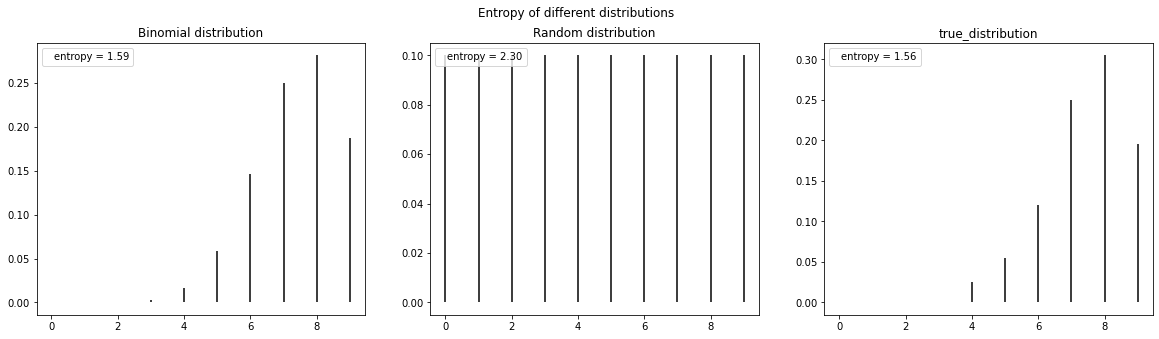

In [42]:
# Example from [1]
import numpy as np 
from scipy import stats
from matplotlib import pyplot as plt
np.random.seed(912)
x = range(0, 10)
q = stats.binom(10, 0.75)
r = stats.randint(0, 10)
true_distribution = [list(q.rvs(200)).count(i) / 200 for i in x]
q_pmf = q.pmf(x)
r_pmf = r.pmf(x)
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].vlines(x, 0, q_pmf, label=f'entropy = {stats.entropy(q_pmf):.2f}')
ax[1].vlines(x, 0, r_pmf, label=f'entropy = {stats.entropy(r_pmf):.2f}')
ax[2].vlines(x, 0, true_distribution, label=f'entropy = {stats.entropy(true_distribution):.2f}')
ax[0].set_title('Binomial distribution')
ax[1].set_title('Random distribution')
ax[2].set_title('true_distribution')
fig.suptitle("Entropy of different distributions")
stats.entropy(true_distribution)
#ax[idx].set_xticks(x)
ax[0].legend(loc=2, handlelength=0)
ax[1].legend(loc=2, handlelength=0)
ax[2].legend(loc=2, handlelength=0)


### Model Averaging

#### Pseudo Bayesian Modeling Averaging

[Using Stacking to Average Bayesian Predictive Distributions](http://www.stat.columbia.edu/~gelman/research/published/stacking_paper_discussion_rejoinder.pdf)

When there are several models that one can chose from, it is tempting to pick the one with the best performance (depending on how we defone performance). However, in doing so we are ignoring the uncertainty information provided by the other models. One way to mitigate this uncertainty is by performing model averaging. The meta-model obtained by using a weighted average of all the models can be used to make predictions. One way that this averaging is done is by computing the weights similar to using a softmax formula

$w_i = \dfrac{e^{-dE_i / 2}}{\sum_j e^{-dE_j / 2}}$

where $dE_i$ is the difference in the WAIC value of the i'th model compared to the model with the lowest WAIC.

Any Information Criterion metric can be used in this equation such as AIC. Averagin the models using the weights computed this way is called pseudo Bayesian Modeling Averaging.


#### Stacking

Another technique that was proposed recently is the stacking of predictive distributions. The idea behind this is to combine models such that you minimize the divergence between the weighted metamodel and the true model. When a logarithmic score is used, similar to a KL Divergence, the following equation can be used

$max_w \dfrac{1}{n} \sum_i^{n} log \sum_k w_k p(y_i | y_{-i}, M_k)$

where n is the number of data points and $M_k$ is the k'th model and $w_k$ is the weight applied to the k'th model. $y_{-i}$ is every element in y except $y_i$. The term $p(y_i | y_{-i}, M_k)$ corresponds to the predictive probability density using a Leave-One-Out cross validation procedure. The goal is to select the combination of weights that maximizes the probability of seeing $y_i$, thereby giving us the ideal metamodel that minimizes the divergence to our best of our knowledge based on the data available. Note here that argmax is computed over 'w' as opposed to 'n' as it listed in some resources.

### Ergodicity

### EVALUATION

1. Underfitting is bad because

    a. It cannot capture complex behavior and will have inherent error (C)

    b. The predicted value is always less than the true value

2. Overfitting is bad because 

    a. The model that is overfit will learn noise (C)

    b. The model is too big

3. Variance of a model is related to 

    a. A model's ability to adapt its parameters to training data
    
    b. The sensitivity of the model to the inputs

4. AIC is a primarily a non-Bayesian metric

    a. True 

    b. False 
